# Training and Visualizing a Decision Tree

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

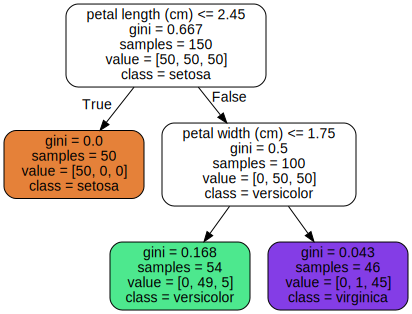

In [24]:
from sklearn.tree import export_graphviz
from graphviz import Source

data = export_graphviz(
    tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

In [3]:
# export_graphviz(
#     tree_clf,
#     out_file="exports/iris_tree.dot",
#     feature_names=["petal length (cm)", "petal width (cm)"],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )
# Source.from_file("exports/iris_tree.dot")

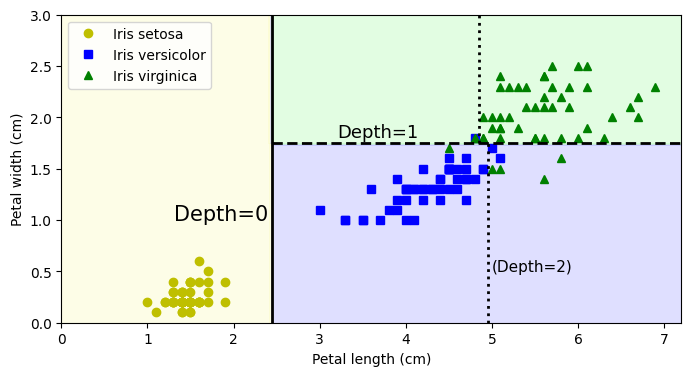

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

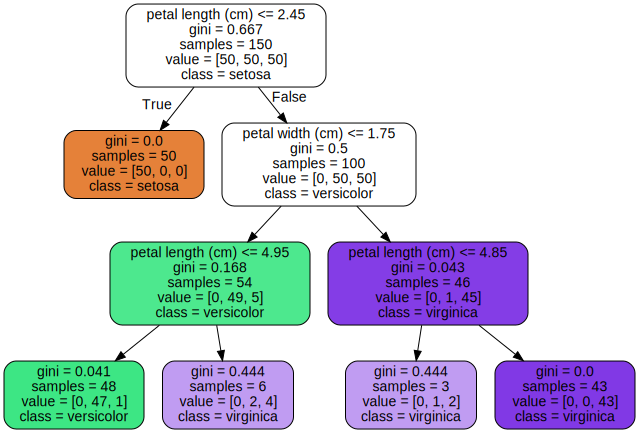

In [5]:
data = export_graphviz(
    tree_clf_deeper,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

In [6]:
tree_clf_deeper.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

# Estimating class probabilities

In [7]:
# value / samples (as for computing Gini impurity)
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

# Gini impurity or Entropy?

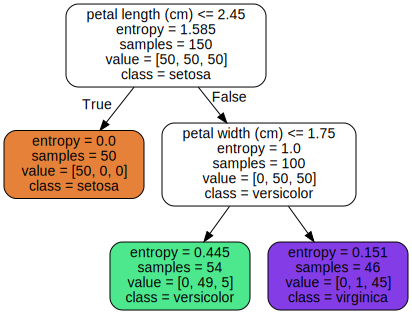

In [9]:
entropy_tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
entropy_tree_clf.fit(X_iris, y_iris)

data = export_graphviz(
    entropy_tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

# Regularization hyperparameters

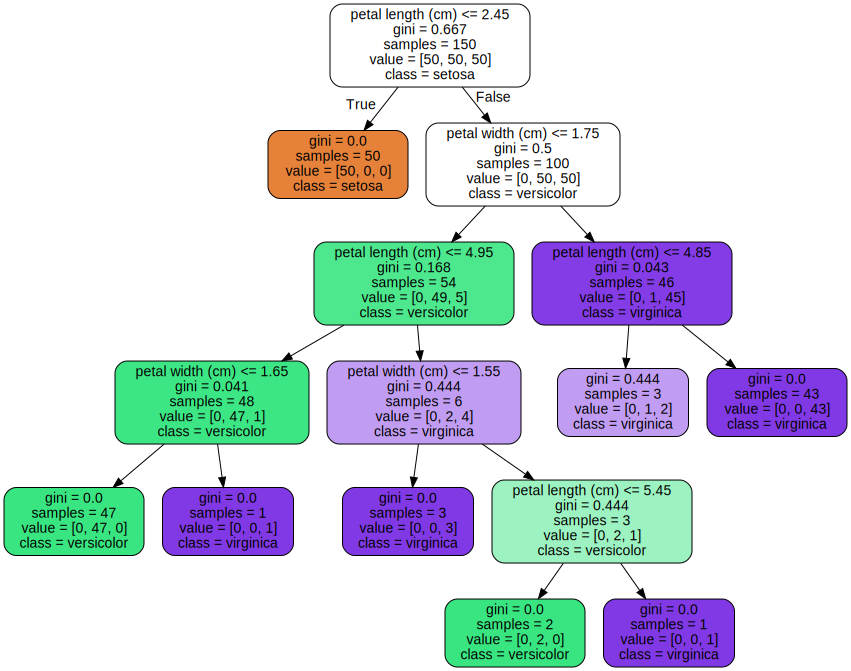

In [10]:
tree_clf_no_explicit_depth = DecisionTreeClassifier(random_state=42)
tree_clf_no_explicit_depth.fit(X_iris, y_iris)

data = export_graphviz(
    tree_clf_no_explicit_depth,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

In [11]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [26]:
X_moons

array([[-1.10598226e+00, -2.56569571e-01],
       [ 5.64104428e-01,  8.40681126e-01],
       [ 1.20954578e+00, -5.53106706e-01],
       [ 1.08389231e-01,  6.04619511e-01],
       [ 5.23244078e-02,  5.20461376e-01],
       [ 5.26350488e-01,  1.00284361e+00],
       [-9.73086200e-01,  5.46526349e-01],
       [ 1.89155141e+00,  9.32950604e-02],
       [-7.12986223e-01,  1.93587527e-01],
       [-4.87201944e-01,  2.76280818e-01],
       [ 8.36090785e-01, -5.54224860e-01],
       [ 9.63601378e-01,  4.54482762e-01],
       [ 8.54289692e-02,  5.94635980e-01],
       [ 7.39277666e-01,  6.53648226e-01],
       [ 6.88228708e-01,  3.87255170e-01],
       [-9.36462461e-01,  4.93421633e-01],
       [ 6.87329742e-01, -5.29399302e-01],
       [-1.10939170e+00,  2.11466731e-01],
       [-5.96388049e-01,  6.70150365e-01],
       [ 1.63573046e+00, -2.44974367e-01],
       [ 4.01103988e-01,  9.41401415e-01],
       [ 1.74809254e+00, -5.33955646e-01],
       [ 2.95136524e-01,  1.04755403e+00],
       [ 1.

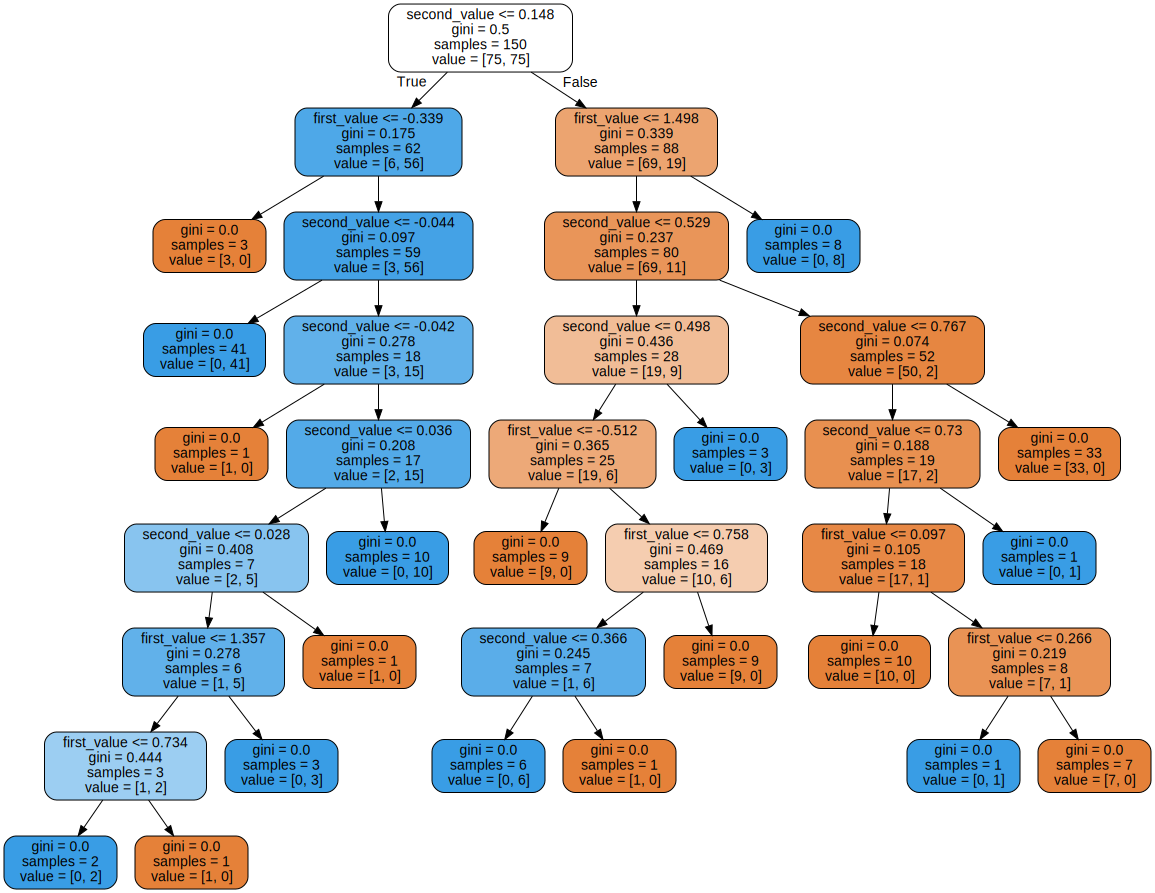

In [34]:
data = export_graphviz(
    tree_clf1,
    feature_names=["first_value", "second_value"],
    rounded=True,
    filled=True
)
Source(data)

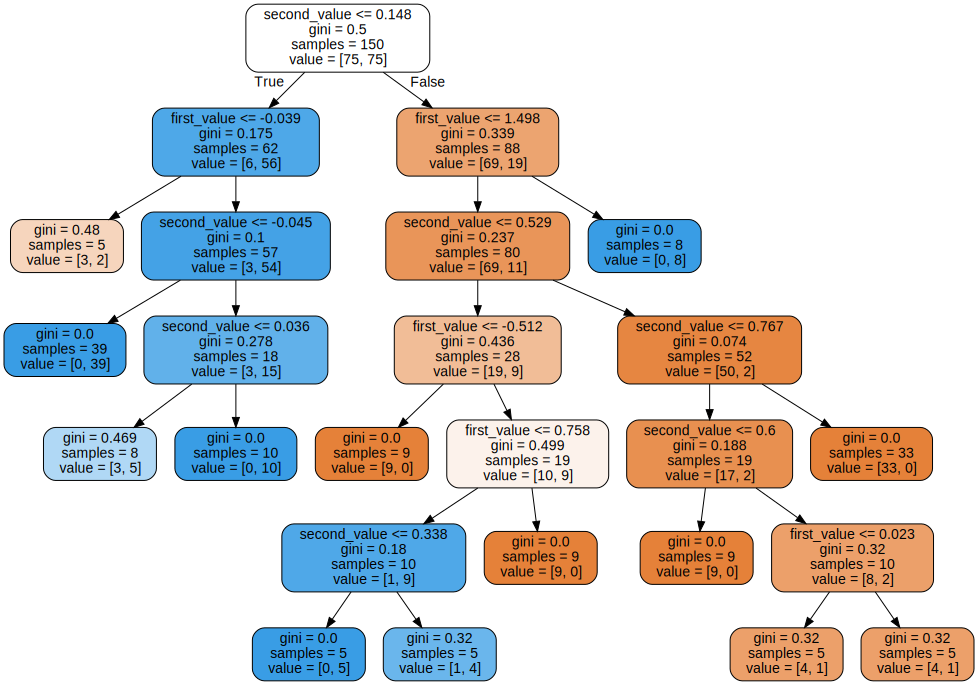

In [33]:
data = export_graphviz(
    tree_clf2,
    feature_names=["first_value", "second_value"],
    rounded=True,
    filled=True
)
Source(data)

In [29]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

print("tree_clf1.score =", tree_clf1.score(X_moons_test, y_moons_test))
print("tree_clf2.score =", tree_clf2.score(X_moons_test, y_moons_test))

tree_clf1.score = 0.898
tree_clf2.score = 0.92


# Regression

In [37]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # A single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

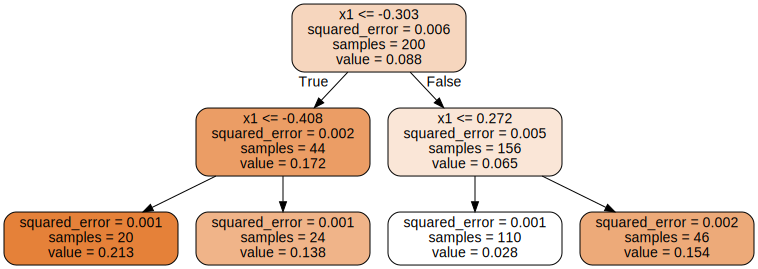

In [38]:
data = export_graphviz(
    tree_reg,
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source(data)

In [59]:
tree_reg.tree_.threshold[[0, 1, 4]]

array([-0.30265072, -0.40830374,  0.27175756])

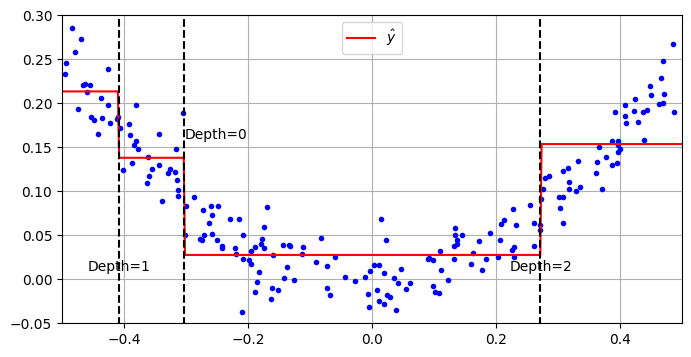

In [78]:
import matplotlib.pyplot as plt

X_new = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_new = tree_reg.predict(X_new)

th0, th1, th2 = tree_reg.tree_.threshold[[0, 1, 4]]

plt.figure(figsize=(8, 4))
plt.plot(X_quad, y_quad, "b.")
plt.plot(X_new, y_new, "r-", label="$\hat{y}$")

plt.text(th0, 0.16, "Depth=0")
plt.plot([th0, th0], [-0.5, 0.5], "k--")

plt.text(th1 - 0.05, 0.01, "Depth=1")
plt.plot([th1, th1], [-0.5, 0.5], "k--")

plt.text(th2 - 0.05, 0.01, "Depth=2")
plt.plot([th2, th2], [-0.5, 0.5], "k--")

plt.axis([-0.5, 0.5, -0.05, 0.3])
plt.legend(loc="upper center")
plt.grid()
plt.show()

In [40]:
X_test = np.random.rand(2000, 1) - 0.75 # A single random input feature
y_test = X_test ** 2 + 0.475 * np.random.randn(2000, 1) + 2.5

print("tree_reg.score =", tree_reg.score(X_test, y_test))

tree_reg.score = -23.949017990399632


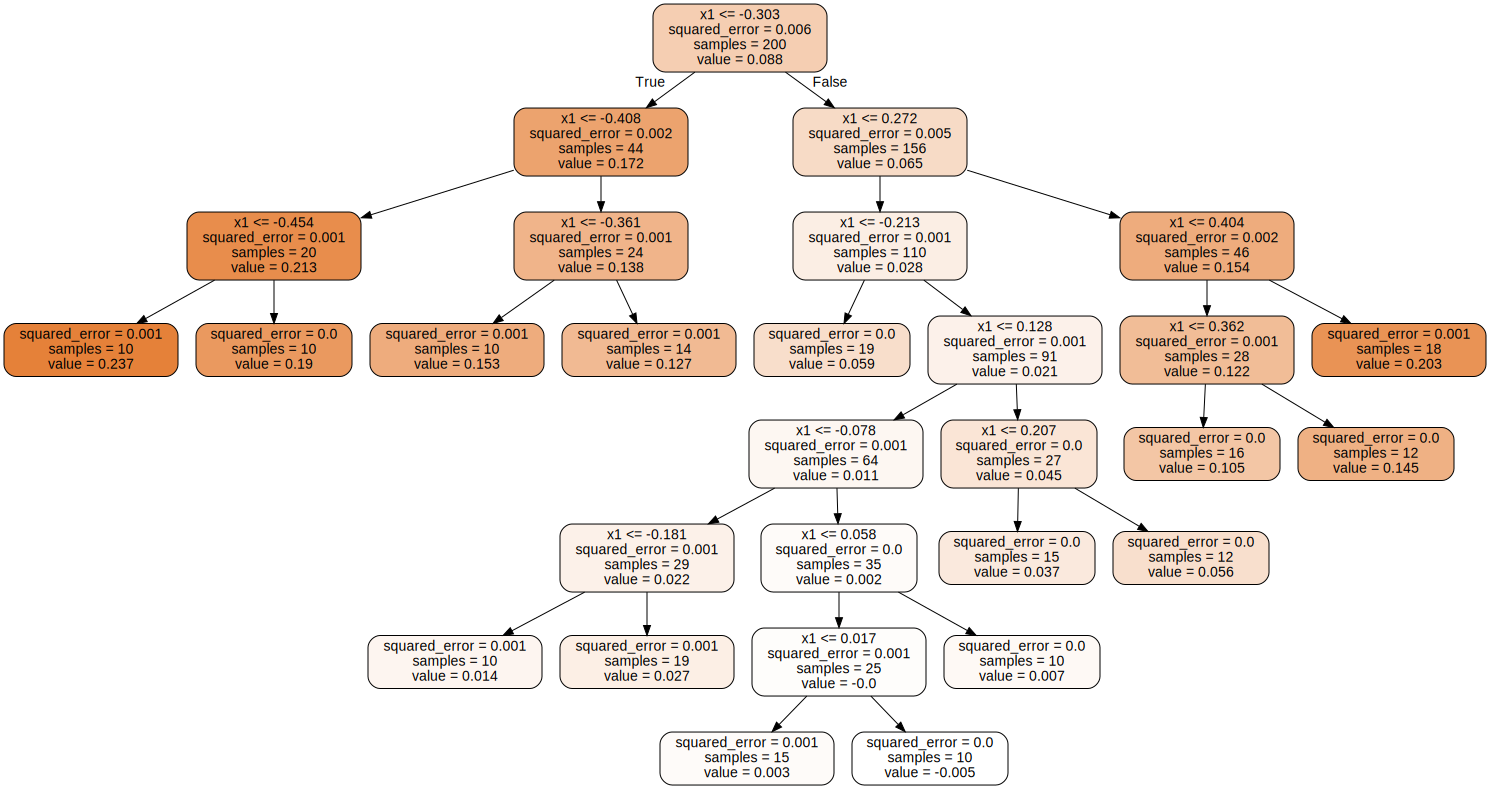

In [86]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # A single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg_no_max_depth = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg_no_max_depth.fit(X_quad, y_quad)

data = export_graphviz(
    tree_reg_no_max_depth,
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source(data)

In [89]:
thresholds = tree_reg_no_max_depth.tree_.threshold
thresholds = thresholds[thresholds != -2]

for th in thresholds:
    print(th)

-0.30265071988105774
-0.40830373764038086
-0.4541611522436142
-0.3614926040172577
0.2717575579881668
-0.21270402520895004
0.12780197709798813
-0.07774060592055321
-0.18060822784900665
0.05823900364339352
0.01651252992451191
0.20746495574712753
0.40399226546287537
0.36191700398921967


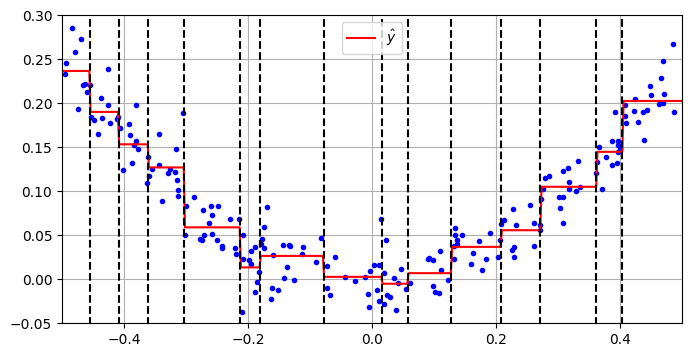

In [94]:
import matplotlib.pyplot as plt

X_new = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_new = tree_reg_no_max_depth.predict(X_new)

thresholds = tree_reg_no_max_depth.tree_.threshold
thresholds = thresholds[thresholds != -2]

plt.figure(figsize=(8, 4))
plt.plot(X_quad, y_quad, "b.")
plt.plot(X_new, y_new, "r-", label="$\hat{y}$")

for i, th in enumerate(thresholds):
    # plt.text(th, 0.16, f"Depth={i}")
    plt.plot([th, th], [-0.5, 0.5], "k--")

plt.axis([-0.5, 0.5, -0.05, 0.3])
plt.legend(loc="upper center")
plt.grid()
plt.show()

# Sensitivity to Axis Orientation (use PCA)

In [95]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

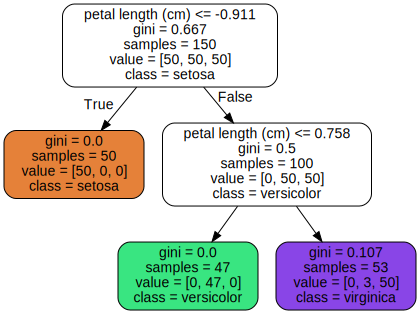

In [96]:
from sklearn.tree import export_graphviz
from graphviz import Source

data = export_graphviz(
    tree_clf_pca,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)